In this project, we will predict whether a plant is suffering from a disease or not using Convolutional Neural Network. I am using Tensorflow and Keras in this project.

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization
drive.mount('drive')

Mounted at drive


In [ ]:
# After executing the above cell, Drive files
# will be present in 'drive/My Drive'
!ls "drive/My Drive"

 2021-8820400.pdf
'2021 Fall Career Fair Company List 9-2-21.pdf'
 A74FFB2F-BE72-450B-A373-5030D3BE5AF4.png
 AtomSetup-x64.exe
'Colab Notebooks'
 ConfirmationLetter.pdf
'Cool presentation script.gdoc'
'Copy of Template Plan of Study.xlsx'
'Cwh java course notes'
'Cwh Python notes'
'Cwh Python notes (1)'
 Engl3854
'Final Exam Review BNd .pdf'
 FoodTruckSystemDesign.gdoc
'Getting started.pdf'
'Giri Resume 12-20-2021.gdoc'
'Giri Resume 12-20-2021.pdf'
'G passport.pdf'
'Gurkirat Singh_resume (1).pdf'
'Gurkirat Singh_resume.pdf'
 GurkiratSingh_VISA.pdf
 HTTPrequestmethods.gdoc
 HW11_traceroutes.gdoc
'I94 - Official Website.pdf'
 IMG_0195.MOV
 IMG-7327.jpg
'IMG_7628 (1).MOV'
 IMG_7628.MOV
'information for google handout.gdoc'
 IrisDataML.gdoc
 IrisDataStats.gdoc
 ISO_Secure_VT_2022_2023.pdf
 JavaChapter1.pdf
'Letter Of Interest.docx'
'Math 3134'
'Math notes (Dis M) and Homeworks '
'ML week 2 .gdoc'
'Networking 1.gdoc'
'Networking 2.5.gdoc'
'Networking 2.gdoc'
'Networking 3.gdoc'
'Non-Residen

In [2]:
# importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 

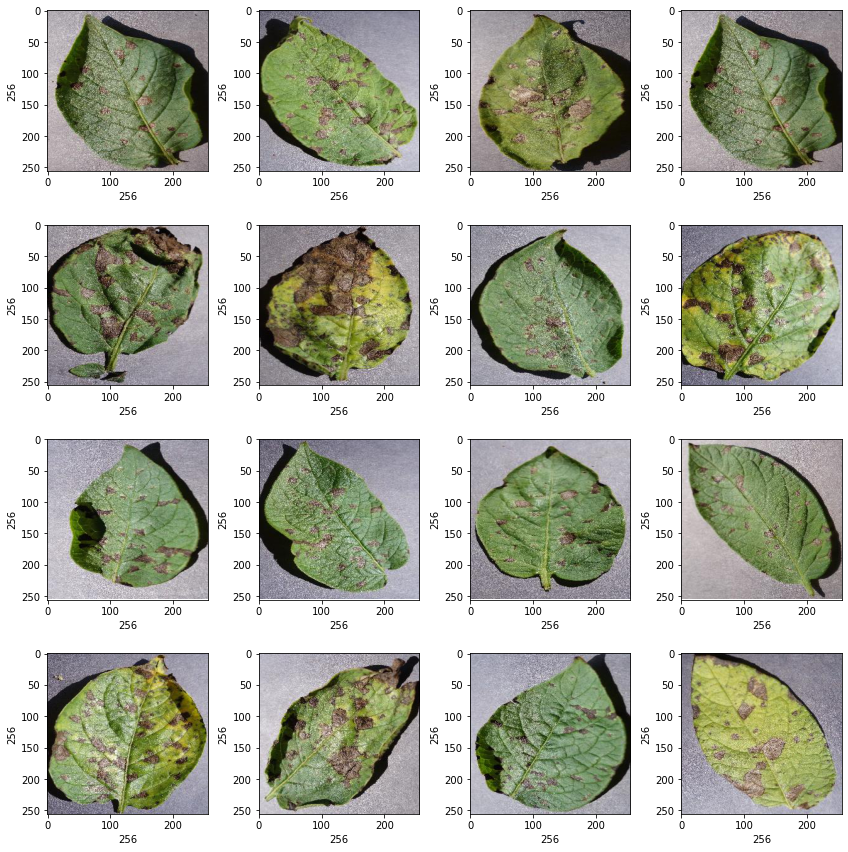

In [5]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "drive/My Drive/Colab Notebooks/data/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [6]:
# making a function to Convert images to numpy arrays
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [7]:
# converting images into numpy arrays
dir = "drive/My Drive/Colab Notebooks/data/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [8]:
# count of each class, balancing of data
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

In [9]:
## shape of the image
image_list[0].shape

(256, 256, 3)

In [10]:
# test train
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size = 0.2, random_state = 10)

In [11]:
# normalizing and reshaping the training data, (value of pixel is from 0 to 255)
x_train = np.array(x_train, dtype=np.float16)/255.0
x_test = np.array(x_test, dtype=np.float16)/255.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)


In [12]:
# converting the data into categorical that is one hot encoding (target variable y)
y_train = to_categorical(y_train)
y_test= to_categorical(y_test)

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
# here we have 3 are param because we have 3 classes to be classified into
model.add(Dense(3, activation="softmax"))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 112896)            0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [21]:
# compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [22]:
# splitting into train and validation dataset
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [23]:
# training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
4/4 [==============================] - 34s 7s/step - loss: 0.8979 - accuracy: 0.5674 - val_loss: 0.6089 - val_accuracy: 0.6552
Epoch 2/50
4/4 [==============================] - 30s 7s/step - loss: 0.4912 - accuracy: 0.7652 - val_loss: 0.3515 - val_accuracy: 0.8879
Epoch 3/50
4/4 [==============================] - 30s 7s/step - loss: 0.3435 - accuracy: 0.8957 - val_loss: 0.2569 - val_accuracy: 0.9655
Epoch 4/50
4/4 [==============================] - 30s 7s/step - loss: 0.2360 - accuracy: 0.9478 - val_loss: 0.1885 - val_accuracy: 0.9741
Epoch 5/50
4/4 [==============================] - 33s 8s/step - loss: 0.1817 - accuracy: 0.9630 - val_loss: 0.1426 - val_accuracy: 0.9741
Epoch 6/50
4/4 [==============================] - 33s 8s/step - loss: 0.1394 - accuracy: 0.9609 - val_loss: 0.1356 - val_accuracy: 0.9569
Epoch 7/50
4/4 [==============================] - 32s 8s/step - loss: 0.1162 - accuracy: 0.9783 - val_loss: 0.0915 - val_accuracy: 0.9741
Epoch 8/50
4/4 [==================

In [24]:
model.save("drive/My Drive/Colab Notebooks/models/plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('drive/My Drive/Colab Notebooks/models/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('drive/My Drive/Colab Notebooks/models/plant_model_weights.h5')

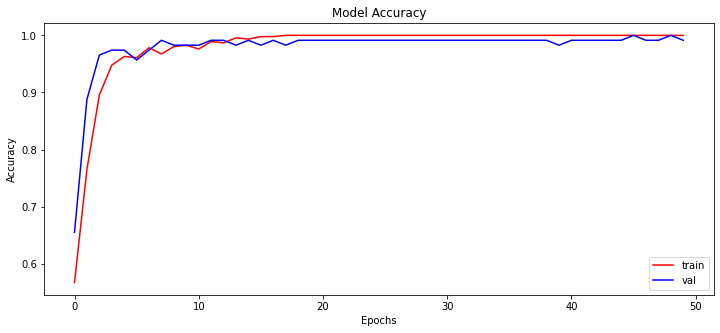

In [25]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [26]:
# Evaluating the model
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 4s 567ms/step - loss: 0.0134 - accuracy: 0.9944
Test Accuracy: 99.44444298744202


In [28]:
y_pred = model.predict(x_test)

6/6 [==============================] - 4s 540ms/step


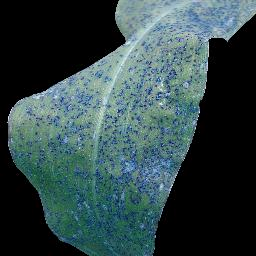

In [27]:
# we will use our model to predict the testing dataset label
img = array_to_img(x_test[0])
img

In [29]:
print("Originally : ",all_labels[np.argmax(y_test[0])])
print("Predicted : ",all_labels[np.argmax(y_pred[0])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight
